In [152]:
from glob import iglob
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
import numpy as np
sns.set()
import warnings
warnings.simplefilter('ignore')

In [3]:
%config InlineBackend.figure_format = 'svg'

In [7]:
path = '.' # use your path
allFiles = iglob(path + "/*.txt")

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,header=None,names=['name','gender','cnt'], sep=',')
    df['year']=file_[-8:-4]
    list_.append(df)

baby = pd.concat(list_, axis = 0, ignore_index = True)

In [8]:
baby.head()

,name,gender,cnt,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


### Сгруппируйте данные по полу и году и визуализируйте общую динамику рождаемости обоих полов

In [9]:
#реализуйте группировку groupby
baby1=baby.groupby(['gender','year'])['cnt'].sum().reset_index()

In [10]:
baby1.head()

,gender,year,cnt
0,F,1880,90993
1,F,1881,91955
2,F,1882,107851
3,F,1883,112322
4,F,1884,129021


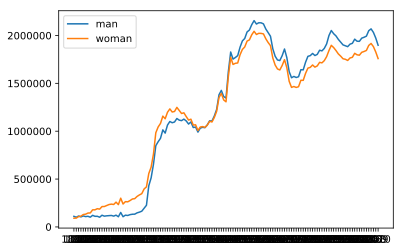

In [11]:
plt.plot(baby1[baby1['gender']=='M']['year'],baby1[baby1['gender']=='M']['cnt'] )
plt.plot(baby1[baby1['gender']=='F']['year'],baby1[baby1['gender']=='F']['cnt'])

plt.legend(['man','woman']);

### Найдите самые популярные имена за всю историю

In [16]:
baby[['name','cnt']].groupby('name').sum().sort_values(by='cnt', ascending=False).head()

,cnt
name,
James,5072771
John,5061897
Robert,4788050
Michael,4265373
Mary,4119074


### Разбейте весь временной промежуток в данных на 10 частей. Найдите самуе популярное имя для каждой группы для каждого пола.Для каждого найденного имени визуализируйте его динамику за все время

In [13]:
bins=np.array(baby.year.astype(int).quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9]))
bins

array([1919., 1936., 1954., 1968., 1979., 1987., 1994., 2000., 2006.])

In [14]:
bins=bins.astype(int)

Создайте новую колонку с номером группы, группа проставляется с помощью функций apply и searchsorted 

In [15]:
baby['group']=baby['year'].apply(lambda x: bins.searchsorted(x, side='left'))

In [16]:
baby.head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1,Anna,F,2604,1880,0
2,Emma,F,2003,1880,0
3,Elizabeth,F,1939,1880,0
4,Minnie,F,1746,1880,0


Для каждой группы соберите статистику по имени и полу. Ф-я groupby

In [17]:
baby2_1=baby[['group','gender','name','cnt']].groupby(['group','gender','name']).sum()

In [18]:
baby2_1.head()

cnt
group gender name       
0     F      Aagot     5
             Aaron    22
             Abbey     8
             Abbie  4027
             Abby    280

Найдите самое популярное имя каждого пола в группе. 
Ф-я groupby,set_index, idxmax() 

In [19]:
baby2_1.groupby(['group','gender'])['cnt'].idxmax()

group  gender
0      F             (0, F, Mary)
       M             (0, M, John)
1      F             (1, F, Mary)
       M           (1, M, Robert)
2      F             (2, F, Mary)
       M            (2, M, James)
3      F             (3, F, Mary)
       M          (3, M, Michael)
4      F         (4, F, Jennifer)
       M          (4, M, Michael)
5      F         (5, F, Jennifer)
       M          (5, M, Michael)
6      F          (6, F, Jessica)
       M          (6, M, Michael)
7      F            (7, F, Emily)
       M          (7, M, Michael)
8      F            (8, F, Emily)
       M            (8, M, Jacob)
9      F         (9, F, Isabella)
       M            (9, M, Jacob)
Name: cnt, dtype: object

In [22]:
#обращаемся к таблице baby2_1 по индексу;idxmax возвращает индексы.в итоге получаем dataframe с самыми популярными именами
baby2_2=baby2_1.loc[baby2_1.groupby(['group','gender'])['cnt'].idxmax()].reset_index()
baby2_2

,group,gender,name,cnt
0,0,F,Mary,862904
1,0,M,John,631524
2,1,F,Mary,1107696
3,1,M,Robert,983054
4,2,F,Mary,1135680
5,2,M,James,1402807
6,3,F,Mary,631639
7,3,M,Michael,1195369
8,4,F,Jennifer,615388
9,4,M,Michael,792698


In [45]:
baby2_3 = baby2_2[['gender','name']].drop_duplicates()

Для каждого найденного имени визуализируйте его динамику за все время.
В цикле по всем именам применить функцию plt.plot()

In [39]:
baby[baby.name=='Mary'].head()

,name,gender,cnt,year,group
0,Mary,F,7065,1880,0
1273,Mary,M,27,1880,0
2000,Mary,F,6919,1881,0
3238,Mary,M,29,1881,0
3935,Mary,F,8149,1882,0


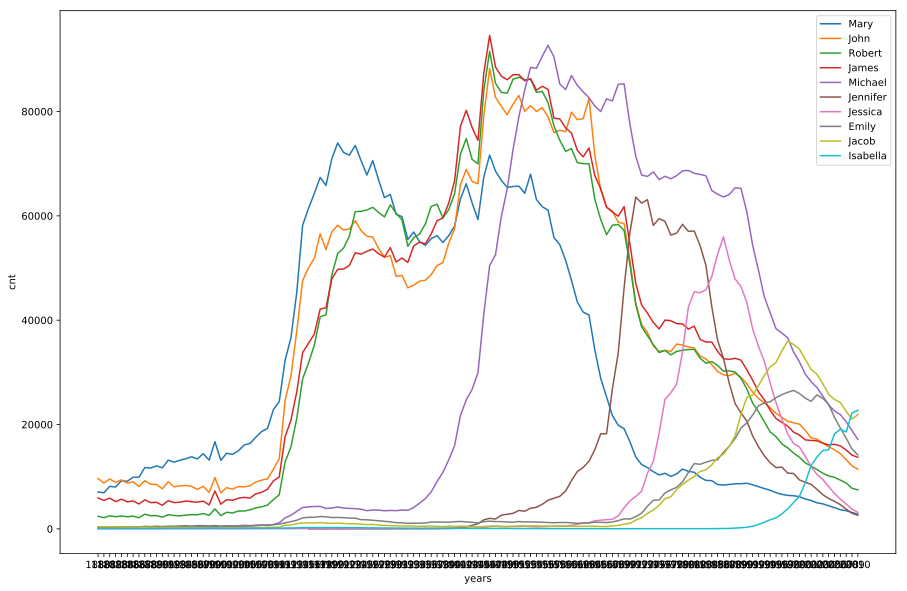

In [46]:
for i, j in zip(baby2_3['name'],baby2_3['gender']):
    plt.plot(baby[(baby.name==i)&(baby.gender==j)]['year'],baby[(baby.name==i)&(baby.gender==j)]['cnt'],label = "%s"%(i));
plt.legend(loc = "upper right")
plt.xlabel('years')
plt.ylabel('cnt');

### Для каждого года рассчитайте сколько имен покрывают 50% людей, визуализируйте (мы увидим разнообразие имен за каждый год).Ф-я cumsum(), shift()

In [113]:
baby['cumsum']=baby.groupby('year')['cnt'].transform(pd.Series.cumsum)
baby['cumsum']=baby['cumsum'] / baby.groupby('year')['cnt'].transform(sum)
baby.head()

,name,gender,cnt,year,group,cumsum,shifted_cumsum,cnt_50
0,Mary,F,7065,1880,0,0.035064,NaN,1
1,Anna,F,2604,1880,0,0.047988,0.000022,1
2,Emma,F,2003,1880,0,0.057930,0.000030,1
3,Elizabeth,F,1939,1880,0,0.067553,0.000036,1
4,Minnie,F,1746,1880,0,0.076219,0.000042,1


In [114]:
years_lst = baby['year'].drop_duplicates().tolist()

In [115]:
baby['cnt_50'] = baby.apply(lambda x: 0 if  x['cumsum'] >= 0.5 else 1, axis = 1)

In [118]:
name_cnt = []
for x in years_lst:
    sum_names = baby[baby['year'] == x]['cnt_50'].sum()
    name_cnt.append(sum_names)

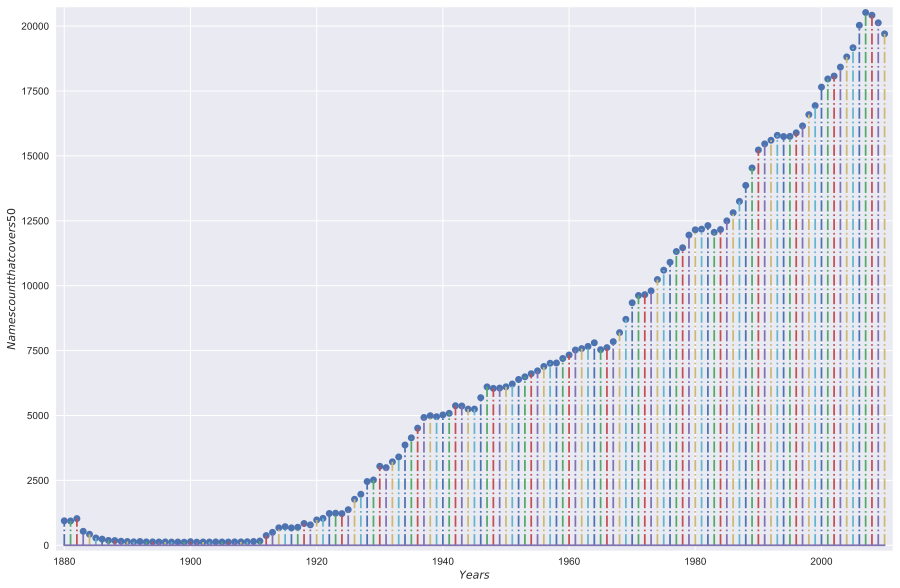

In [133]:
years_lst = [int(x) for x in years_lst]
plt.stem(years_lst,name_cnt,'-.')
plt.margins(0.01)
plt.xlabel("$Years$")
plt.ylabel("$Names count that covers 50% of all$");

### Выбирете 4 года из всего промежутка и для каждого отобразите распределение по первой букве имени, по последней букве имени

In [134]:
baby.head()

,name,gender,cnt,year,group,cumsum,shifted_cumsum,cnt_50
0,Mary,F,7065,1880,0,0.035064,NaN,1
1,Anna,F,2604,1880,0,0.047988,0.000022,1
2,Emma,F,2003,1880,0,0.057930,0.000030,1
3,Elizabeth,F,1939,1880,0,0.067553,0.000036,1
4,Minnie,F,1746,1880,0,0.076219,0.000042,1


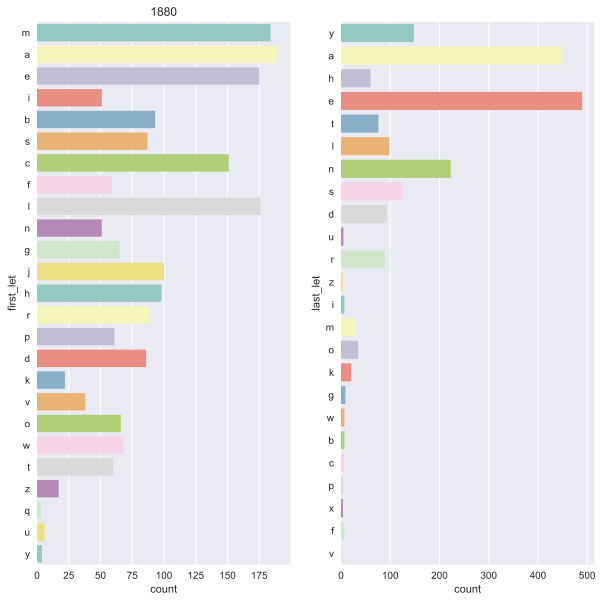

In [173]:

df_year = baby[baby['year'] == str(1880)]
df_year['first_let'] = df_year.name.str.lower().str[0]
df_year['last_let'] = df_year.name.str[-1]
fig, ax =plt.subplots(1,2,figsize=(10,10))
ax[0].set_title("1880")
sns.countplot(y = 'first_let',palette="Set3",data = df_year,orient='h',ax = ax[0])
sns.countplot(y = 'last_let',palette="Set3",data = df_year,orient='h', ax = ax[1]);


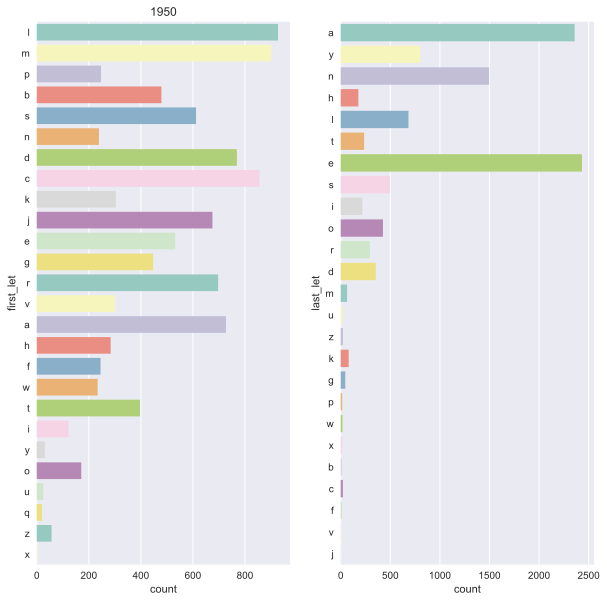

In [175]:
df_year = baby[baby['year'] == str(1950)]
df_year['first_let'] = df_year.name.str.lower().str[0]
df_year['last_let'] = df_year.name.str[-1]
fig, ax =plt.subplots(1,2,figsize=(10,10))
ax[0].set_title("1950")
sns.countplot(y = 'first_let',palette="Set3",data = df_year,orient='h',ax = ax[0])
sns.countplot(y = 'last_let',palette="Set3",data = df_year,orient='h', ax = ax[1]);

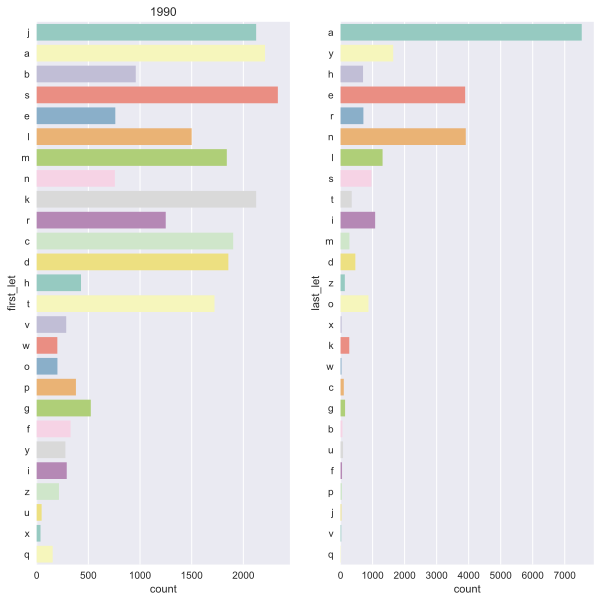

In [176]:
df_year = baby[baby['year'] == str(1990)]
df_year['first_let'] = df_year.name.str.lower().str[0]
df_year['last_let'] = df_year.name.str[-1]
fig, ax =plt.subplots(1,2,figsize=(10,10))
ax[0].set_title("1990")
sns.countplot(y = 'first_let',palette="Set3",data = df_year,orient='h',ax = ax[0])
sns.countplot(y = 'last_let',palette="Set3",data = df_year,orient='h', ax = ax[1]);

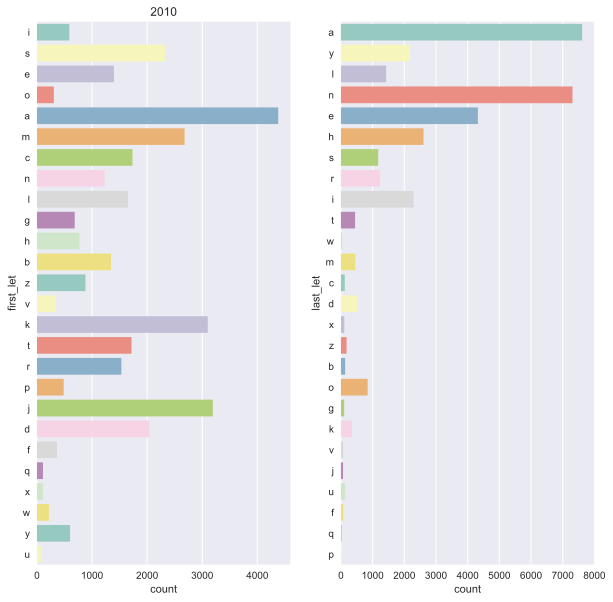

In [177]:
df_year = baby[baby['year'] == str(2010)]
df_year['first_let'] = df_year.name.str.lower().str[0]
df_year['last_let'] = df_year.name.str[-1]
fig, ax =plt.subplots(1,2,figsize=(10,10))
ax[0].set_title("2010")
sns.countplot(y = 'first_let',palette="Set3",data = df_year,orient='h',ax = ax[0])
sns.countplot(y = 'last_let',palette="Set3",data = df_year,orient='h', ax = ax[1]);

### Составьте список из имен известных людей и оцените их влияние на динамику имен

In [189]:
#Красными линиями обозначены моменты, когда известность человека достигала максимума
name_famous = ['John F Kennedy','Bob Dylan','Neil Armstrong','Barack Obama','Monica Lewinsky']

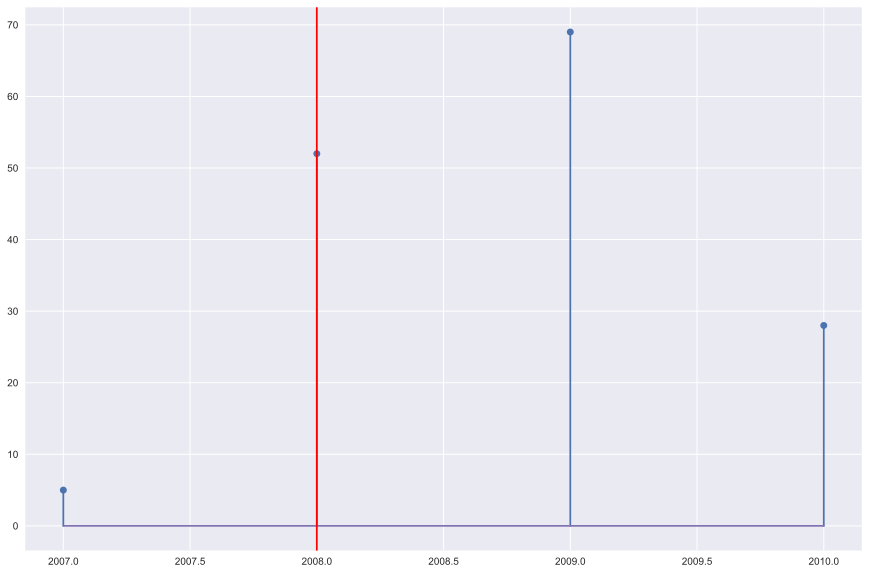

In [188]:
df_barack = baby[baby['name'].str.lower() == 'barack']
years_barack = df_barack['year'].tolist()
years_barack=[int(x) for x in years_barack]
plt.stem(years_barack,df_barack['cnt'])
plt.axvline(x=2008,c='red');

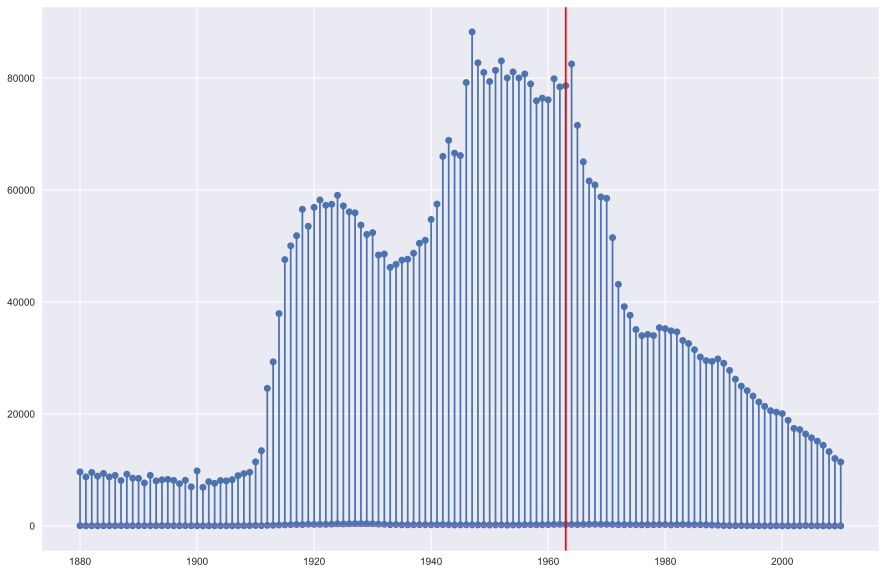

In [193]:
df_name = baby[baby['name'].str.lower() == 'john']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.axvline(x=1963,c='red');

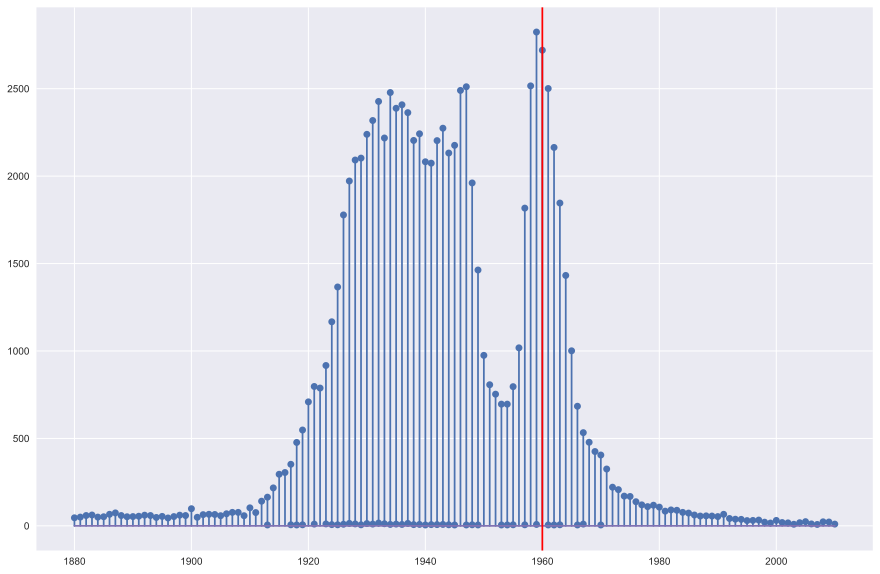

In [195]:
df_name = baby[baby['name'].str.lower() == 'bob']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.axvline(x=1960,c='red');

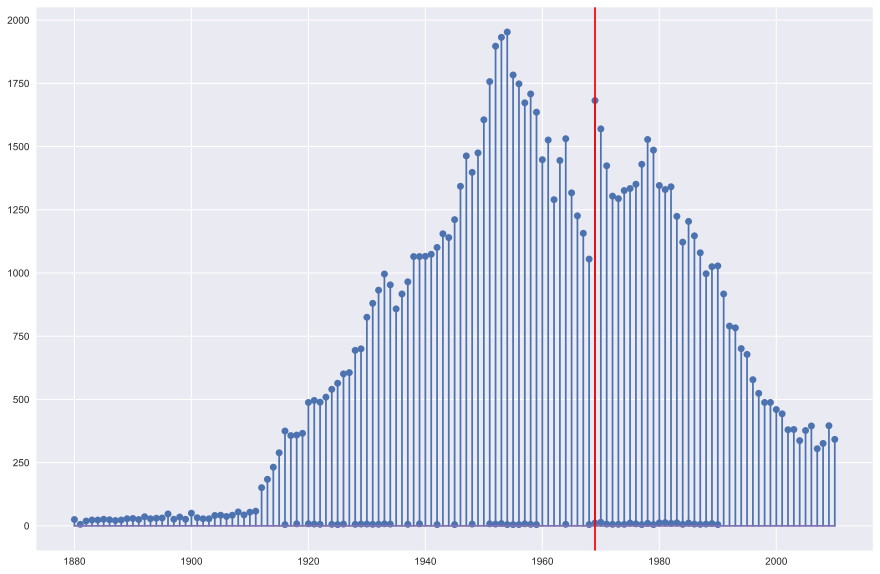

In [199]:
df_name = baby[baby['name'].str.lower() == 'neil']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.axvline(x=1969,c='red');

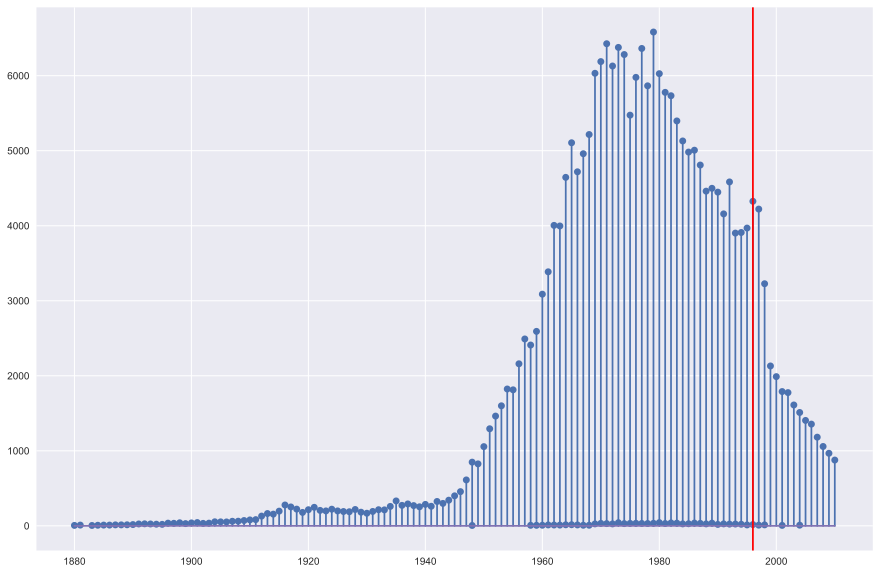

In [201]:
df_name = baby[baby['name'].str.lower() == 'monica']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.axvline(x=1996,c='red');

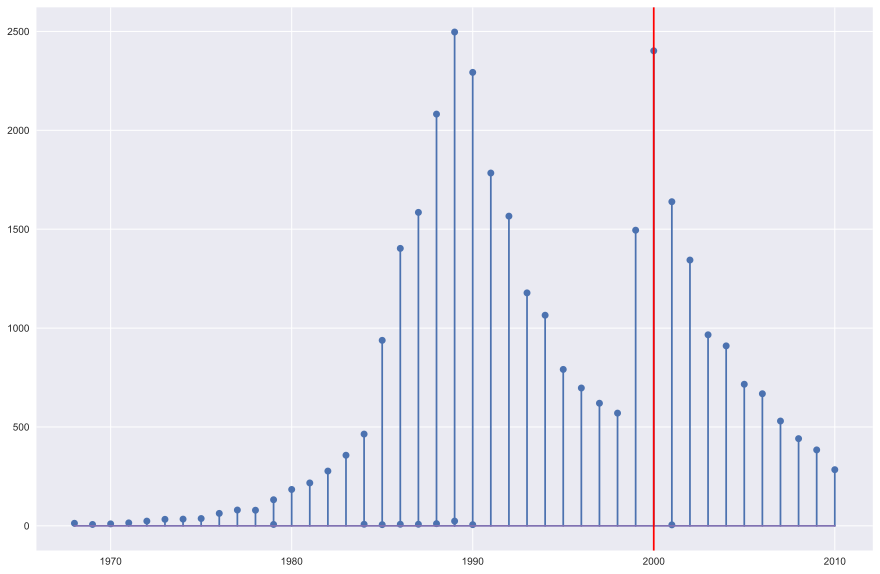

In [203]:
df_name = baby[baby['name'].str.lower() == 'britney']
years_name = df_name['year'].tolist()
years_name=[int(x) for x in years_name]
plt.stem(years_name,df_name['cnt'])
plt.axvline(x=2000,c='red');